## Regression dev - Ocean data

In [1]:
cd ..

/Users/ryanrappa/Desktop/GoogleDrive/ds/kaggle_tools


In [28]:
import pandas as pd
import numpy as np
from src.regression import Regression

In [3]:
df = pd.read_csv('data/bottle.csv')
df = df.select_dtypes(exclude=['object'])
df = df.dropna(thresh=800000, axis=1)
df = df.dropna()
df = df[df.columns.drop(list(df.filter(regex='R_')))] #dropping duplicate columns
df = df.drop(['Cst_Cnt', 'Btl_Cnt'], axis=1) #dropping index-like columns

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733418 entries, 0 to 864860
Data columns (total 12 columns):
Depthm    733418 non-null int64
T_degC    733418 non-null float64
Salnty    733418 non-null float64
STheta    733418 non-null float64
RecInd    733418 non-null int64
T_prec    733418 non-null float64
S_prec    733418 non-null float64
NH3q      733418 non-null float64
C14A1q    733418 non-null float64
C14A2q    733418 non-null float64
DarkAq    733418 non-null float64
MeanAq    733418 non-null float64
dtypes: float64(10), int64(2)
memory usage: 72.7 MB


In [5]:
df.columns

Index(['Depthm', 'T_degC', 'Salnty', 'STheta', 'RecInd', 'T_prec', 'S_prec',
       'NH3q', 'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq'],
      dtype='object')

In [6]:
df.head()

,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,S_prec,NH3q,C14A1q,C14A2q,DarkAq,MeanAq
0,0,10.50,33.440,25.649,3,1.0,2.0,9.0,9.0,9.0,9.0,9.0
1,8,10.46,33.440,25.656,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0
2,10,10.46,33.437,25.654,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0
3,19,10.45,33.420,25.643,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0
4,20,10.45,33.421,25.643,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0


In [7]:
df.describe()

,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,S_prec,NH3q,C14A1q,C14A2q,DarkAq,MeanAq
count,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000
mean,228.062580,10.764656,33.861743,25.848316,4.723822,2.018854,2.694038,8.944438,8.999992,8.999992,8.999992,8.999992
std,309.103372,4.242786,0.460998,1.180908,1.865705,0.154670,0.460814,0.524139,0.002860,0.002860,0.002860,0.002860
min,0.000000,1.440000,28.431000,20.934000,3.000000,1.000000,2.000000,4.000000,8.000000,8.000000,8.000000,8.000000
25%,50.000000,7.670000,33.510000,25.004000,3.000000,2.000000,2.000000,9.000000,9.000000,9.000000,9.000000,9.000000
50%,125.000000,9.980000,33.900000,26.043000,3.000000,2.000000,3.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,300.000000,13.780000,34.210000,26.661000,7.000000,2.000000,3.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,5351.000000,31.140000,37.034000,250.784000,7.000000,3.000000,3.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [8]:
## ID'ing outliers: https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
from scipy import stats
print("Rows with outliers:", len(df[~(np.abs(stats.zscore(df)) < 3).all(axis=1)])) #numer of rows with outliers
df[~(np.abs(stats.zscore(df)) < 3).all(axis=1)].head() #see rows with outliers
# df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)] #keep only rows w/o outliers

Rows with outliers: 41023


,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,S_prec,NH3q,C14A1q,C14A2q,DarkAq,MeanAq
0,0,10.50,33.440,25.649,3,1.0,2.0,9.0,9.0,9.0,9.0,9.0
29,0,10.10,32.950,25.335,3,1.0,2.0,9.0,9.0,9.0,9.0,9.0
59,1200,3.15,34.429,27.423,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0
60,1203,3.14,34.430,27.425,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0
61,0,10.20,32.630,25.069,3,1.0,2.0,9.0,9.0,9.0,9.0,9.0


In [9]:
X_cols = ['Depthm', 'Salnty', 'STheta', 'RecInd', 'T_prec']
y_col = 'T_degC'

In [10]:
df[['Depthm', 'Salnty', 'STheta', 'RecInd', 'T_prec']].head()
#making sure columns stay in input order, for correct labeling of coefs later

,Depthm,Salnty,STheta,RecInd,T_prec
0,0,33.440,25.649,3,1.0
1,8,33.440,25.656,3,2.0
2,10,33.437,25.654,7,2.0
3,19,33.420,25.643,3,2.0
4,20,33.421,25.643,7,2.0


In [11]:
reg = Regression(df, X_cols, y_col)

In [12]:
reg.y_scaled

array([-0.06237786, -0.07180563, -0.07180563, ..., -1.16589872,
        1.88068622,  1.86843012])

In [13]:
reg.y

array([10.5  , 10.46 , 10.46 , ...,  5.818, 18.744, 18.692])

In [14]:
reg.y_log

array([1.0211893 , 1.01953168, 1.01953168, ..., 0.76477372, 1.27286228,
       1.27165577])

In [34]:
# %%time
# alphas = np.logspace(-2, .5, 10)
# l1_ratios = np.linspace(0, 1, 5)
# elastic_net, preds = reg.elastic_net(alphas, l1_ratios, 10)
### 500 models --> 30 minutes: DO FEWER

-------- BEST MODEL --------
ElasticNet(alpha=0.464158883361278, copy_X=True, fit_intercept=True,
      l1_ratio=0.25, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)
-------- ---------- --------
CPU times: user 4.19 s, sys: 786 ms, total: 4.98 s
Wall time: 29min 56s


In [41]:
# elastic_net.best_estimator_.coef_

array([-1.18206724, -0.09162409, -1.93545801, -0.        , -0.0076751 ])

In [18]:
%%time
alphas = np.logspace(-2, .5, 5)
l1_ratios = np.linspace(0, 1, 3)
elastic_net, preds = reg.elastic_net(alphas, l1_ratios, 5)

-------- BEST MODEL --------
ElasticNet(alpha=0.7498942093324559, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)
-------- ---------- --------
CPU times: user 788 ms, sys: 178 ms, total: 965 ms
Wall time: 6min 4s


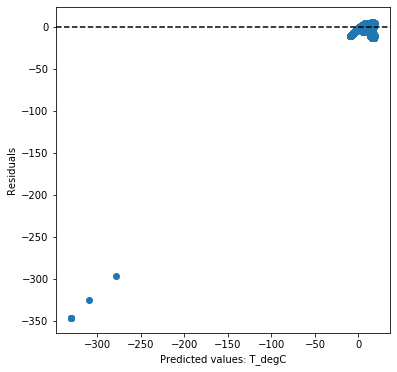

MSE: 6.002883322072935
MAE: 1.7941082886297566
R^2: 0.6665289145489626
Median Absolute Error: 1.5626477600129842
CPU times: user 7.83 s, sys: 43.6 ms, total: 7.88 s
Wall time: 7.75 s


In [19]:
%%time
reg.plot_residuals(preds)

T_prec   -0.000000
RecInd   -0.000000
Salnty   -0.009819
Depthm   -1.064164
STheta   -1.793534
dtype: float64
Intercept   10.764655737928456


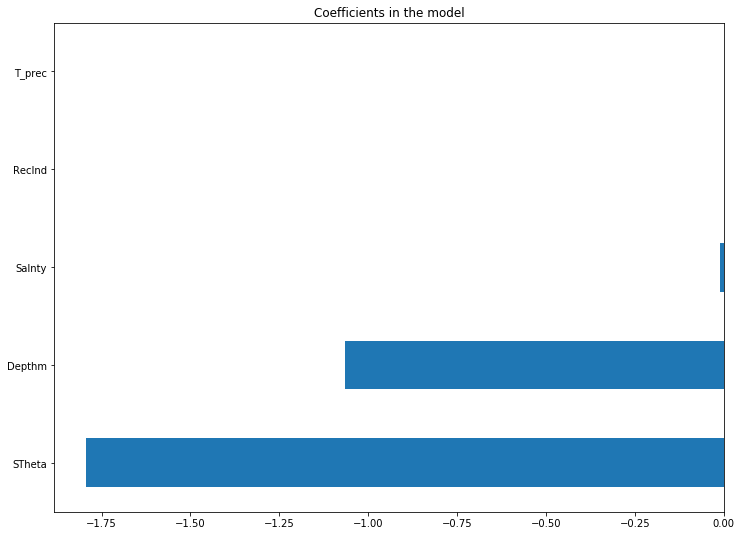

In [34]:
reg.coefficient_plot(elastic_net)

In [22]:
%%time
alphas = np.logspace(-2, .5, 5)
l1_ratios = np.linspace(0, 1, 3)
elastic_net_sgd, preds = reg.elastic_net_sgd(alphas, l1_ratios, 5)

-------- BEST MODEL --------
SGDRegressor(alpha=0.1778279410038923, average=False, early_stopping=False,
             epsilon=0.1, eta0=0.01, fit_intercept=True, l1_ratio=0.0,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='elasticnet', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False)
-------- ---------- --------
CPU times: user 5.82 s, sys: 211 ms, total: 6.03 s
Wall time: 1min 16s


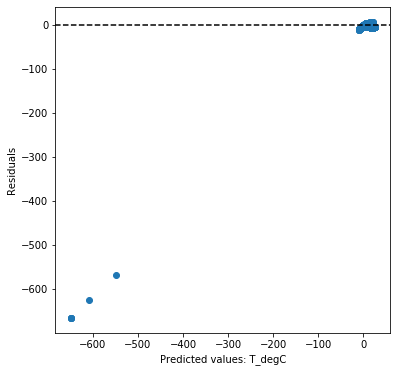

MSE: 4.990865888262279
MAE: 0.9716383757950982
R^2: 0.722748323463223
Median Absolute Error: 0.8002622158427783
CPU times: user 8.16 s, sys: 47.1 ms, total: 8.21 s
Wall time: 8.15 s


In [23]:
%%time
reg.plot_residuals(preds)

Salnty    0.415773
RecInd   -0.037549
T_prec   -0.080294
Depthm   -0.953607
STheta   -3.465901
dtype: float64
Intercept   [10.75015951]


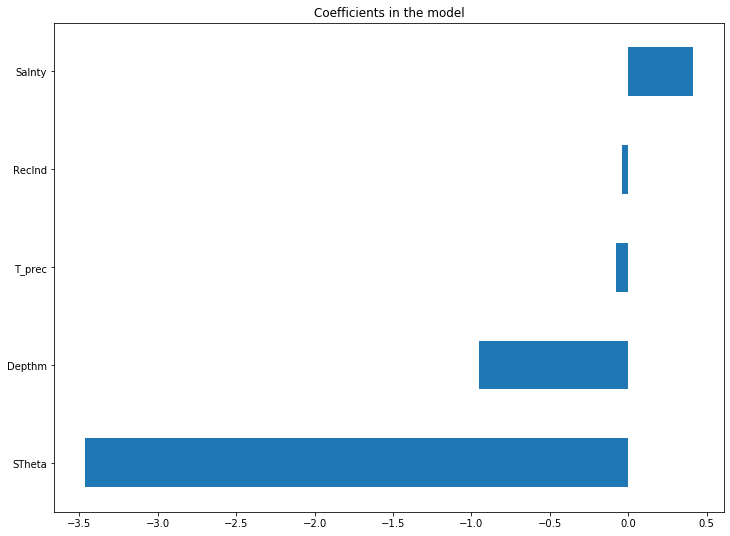

In [36]:
reg.coefficient_plot(elastic_net_sgd)

In [25]:
ransac, preds = reg.ransac(5)

-------- BEST MODEL --------
RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=2.0, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)
-------- ---------- --------


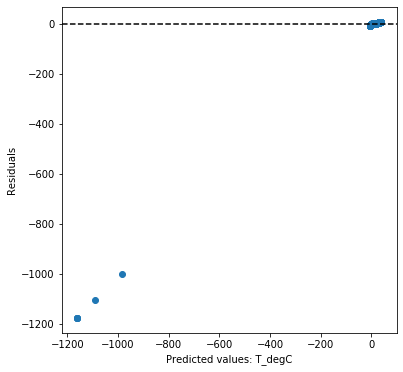

MSE: 10.896066762911857
MAE: 0.258064097673485
R^2: 0.3947036756129306
Median Absolute Error: 0.12996810101519962


In [26]:
reg.plot_residuals(preds)

In [ ]:
#no coefs with Ransac

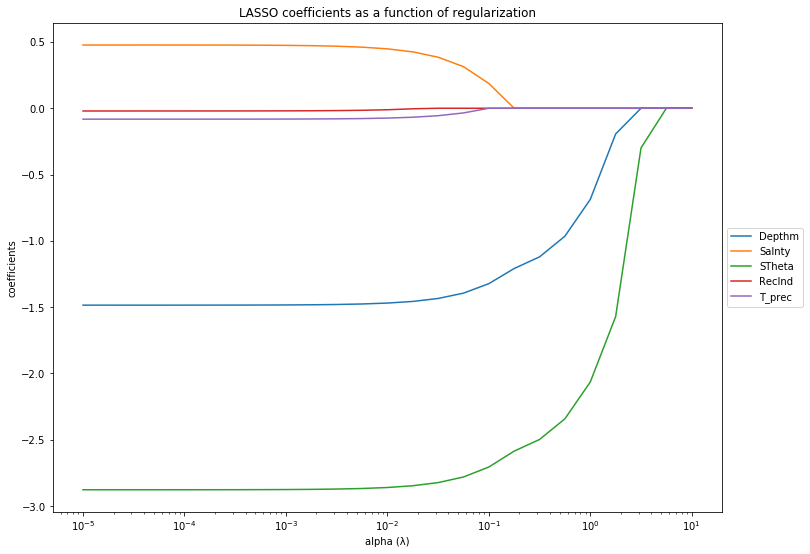

CPU times: user 7.73 s, sys: 204 ms, total: 7.94 s
Wall time: 4.34 s


In [30]:
%%time
reg.lasso_plot(np.logspace(-5, 1, 25))
#without y scaled

### RANSAC - testing

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor, ElasticNet, SGDRegressor

In [82]:
X = df['STheta'].values.reshape(-1, 1)
y = df['T_degC'].values.reshape(-1, 1)

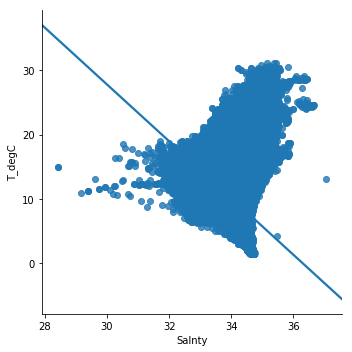

In [63]:
sns.lmplot(x='STheta', y='T_degC', data=df)

In [65]:
ransac = RANSACRegressor()
ransac.fit(X, y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_threshold=None,
        stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

CPU times: user 1.45 s, sys: 14.5 ms, total: 1.46 s
Wall time: 1.47 s


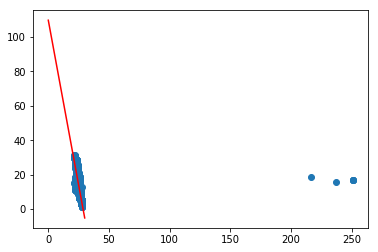

In [66]:
%%time
line_x = np.array([0, 30])
plt.scatter(X, y)
y_pred = ransac.predict(line_x.reshape(2, 1))
plt.plot(line_x, y_pred, color='r')

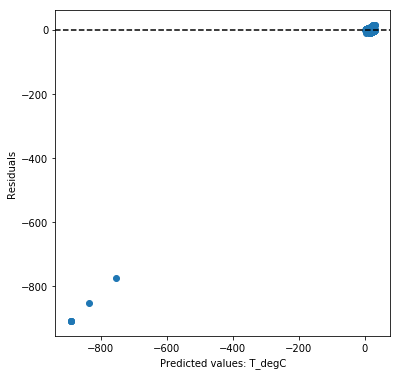

MSE: 7.6492953054592645
MAE: 0.77516945059336
R^2: 0.5750677346888414
Median absolute error: 0.4960164240878049


In [23]:
reg.plot_residuals(ransac_preds.ravel())

In [96]:
ens = SGDRegressor() #was something funky in full params causing line to be ve
ens.fit(X, y)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [97]:
ens.coef_

array([5683956.9523237])

(27, 32)

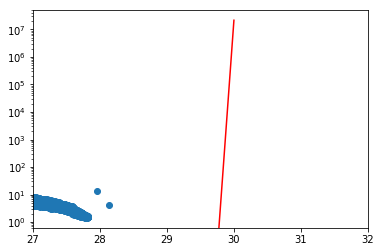

In [104]:
line_x = np.array([0, 30])
plt.scatter(X, y)
y_pred = ens.predict(line_x.reshape(2, 1))
plt.plot(line_x, y_pred, color='r')
plt.yscale('log') #needed because default scale was effed up for some reason 
plt.xlim((27, 32)) #hmmmm.... ok

In [11]:
en = ElasticNet(alpha=0.464158883361278, copy_X=True, fit_intercept=True,
      l1_ratio=0.25, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)
en.fit(X, y)

CPU times: user 1.46 s, sys: 8.75 ms, total: 1.47 s
Wall time: 1.47 s


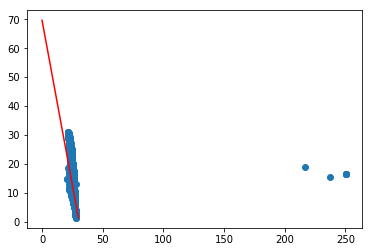

In [16]:
%%time
line_x = np.array([0, 30])
plt.scatter(X, y)
y_pred = en.predict(line_x.reshape(2, 1))
plt.plot(line_x, y_pred, color='r')

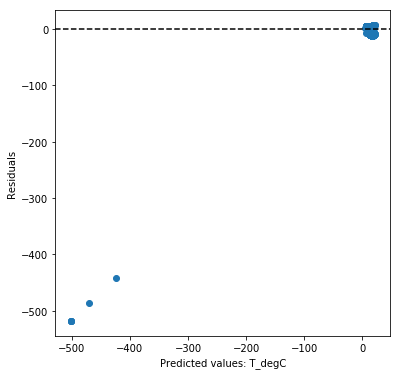

MSE: 6.613309182327908
MAE: 1.665319130389541
R^2: 0.6326186478845899
Median absolute error: 1.3333597187815744


In [24]:
reg.plot_residuals(en_preds.ravel()) #ravel necessary when dealing with single cols

Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [54.17236387] [82.08533159]


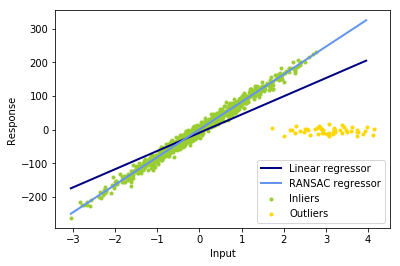

In [71]:
# import numpy as np
# from matplotlib import pyplot as plt

# from sklearn import linear_model, datasets


# n_samples = 1000
# n_outliers = 50


# X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
#                                       n_informative=1, noise=10,
#                                       coef=True, random_state=0)

# # Add outlier data
# np.random.seed(0)
# X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
# y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# # Fit line using all data
# lr = linear_model.LinearRegression()
# lr.fit(X, y)

# # Robustly fit linear model with RANSAC algorithm
# ransac = linear_model.RANSACRegressor()
# ransac.fit(X, y)
# inlier_mask = ransac.inlier_mask_
# outlier_mask = np.logical_not(inlier_mask)

# # Predict data of estimated models
# line_X = np.arange(X.min(), X.max())[:, np.newaxis]
# line_y = lr.predict(line_X)
# line_y_ransac = ransac.predict(line_X)

# # Compare estimated coefficients
# print("Estimated coefficients (true, linear regression, RANSAC):")
# print(coef, lr.coef_, ransac.estimator_.coef_)

# lw = 2
# plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
#             label='Inliers')
# plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
#             label='Outliers')
# plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
# plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw,
#          label='RANSAC regressor')
# plt.legend(loc='lower right')
# plt.xlabel("Input")
# plt.ylabel("Response")
# plt.show()

In [105]:
round(1.97)

2